**###### Third Optimization Test ######**
---
Add an extra hidden layer, change layer node amounts from 20 & 5 to be 13, 6 & 4, and allow 200 Epochs. Also bin the "NAMES" together instead of dropping the column as it seems some companies apply for investment funding repeatedly. Bin "NAMES" into an "Other" labeling if they appear less than 5 times.

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
url = "https://drive.google.com/file/d/1xRlZqRGPecTUmGXoGHwbzsEFra8-0YLk/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
application_df_orig = pd.read_csv(url)
application_df_orig.head()


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN'.
application_df2 = application_df_orig.drop(columns="EIN")
application_df2.head()


,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Replace the application value counts if counts are less than 500 for binning
# Gather APPLICATION_TYPE value counts for binning
count_application_type = application_df2["APPLICATION_TYPE"].value_counts()

replace_application = list(count_application_type[count_application_type < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df2.APPLICATION_TYPE = application_df2.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df2.APPLICATION_TYPE.value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [4]:
# Replace the classification value counts if counts are less than 1000 for binning
# Gather CLASSIFICATION value counts for binning
count_classification = application_df2["CLASSIFICATION"].value_counts()

replace_class = list(count_classification[count_classification < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df2.CLASSIFICATION = application_df2.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df2.CLASSIFICATION.value_counts()


C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [5]:
# Replace the names value counts if counts are less than 10 for binning
# Gather CLASSIFICATION value counts for binning
count_names = application_df2["NAME"].value_counts()

replace_names = list(count_names[count_names < 5].index)

# Replace in dataframe
for name in replace_names:
    application_df2.NAME = application_df2.NAME.replace(name,"Other")
    
# Check to make sure binning was successful
application_df2.NAME.value_counts()


Other                                                                19803
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
                                                                     ...  
GUILDS OF THE SANTA FE OPERA INC                                         5
FAMILY MOTOR COACH ASSOCIATION                                           5
JAMESTOWN SOCIETY                                                        5
MOST WORSHIPFUL PRINCE HALL GRAND LODGE OF FREE & ACCEPTED MASONS        5
PTA HAWAII CONGRESS                                                      5
Name: NAME, Length: 403, dtype: int64

In [6]:
# Generate our categorical variable lists
application_cat3 = application_df2.dtypes[application_df2.dtypes == "object"].index.tolist()
application_cat3

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [7]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df3 = pd.DataFrame(enc.fit_transform(application_df2[application_cat3]))

# Add the encoded variable names to the dataframe
encode_df3.columns = enc.get_feature_names_out(application_cat3)
encode_df3.head()

,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
# Merge one-hot encoded features and drop the originals
application_df3 = application_df2.merge(encode_df3,left_index=True, right_index=True)
application_df3 = application_df2.drop(application_cat3,1)
application_df3.head()


<ipython-input-8-1c07fb807e33>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df3 = application_df2.drop(application_cat3,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL
0,1,5000,1
1,1,108590,1
2,1,5000,0
3,1,6692,1
4,1,142590,1


In [9]:
# Split our preprocessed data into our features and target arrays
y3 = application_df3["IS_SUCCESSFUL"].values
X3 = application_df3.drop(["IS_SUCCESSFUL"],axis=1).values

# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=42)


In [10]:
# Create a StandardScaler instances
scaler3 = StandardScaler()

# Fit the StandardScaler
X_scaler3 = scaler3.fit(X_train3)

# Scale the data
X_train_scaled3 = X_scaler3.transform(X_train3)
X_test_scaled3 = X_scaler3.transform(X_test3)


In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features3 = len(X_train_scaled3[0])
hidden_nodes_layer1_3 = 13
hidden_nodes_layer2_3 = 6
hidden_nodes_layer3_3 = 4

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1_3, 
                             input_dim=number_input_features3, 
                             activation="relu")
)

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2_3, activation="relu"))


# Third hidden layer
## Change activation to tanh to facilitate transition from relu to sigmoid
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3_3, activation="tanh"))

# Output layer
## Sigmoid is slightly more in-depth than RELU, which makes it a good model to output with
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                39        
                                                                 
 dense_1 (Dense)             (None, 6)                 84        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [13]:
# import dependency
import os
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create the callback variable
mc = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model3 = nn3.fit(X_train3,y_train3,epochs=200, callbacks = [mc])


Epoch 1/200
798/804 [============================>.] - ETA: 0s - loss: 0.6991 - accuracy: 0.5319
Epoch 1: saving model to checkpoints/weights.01.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6991 - accuracy: 0.5318
Epoch 2/200
802/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 2: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5318
Epoch 3/200
790/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 3: saving model to checkpoints/weights.03.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5318
Epoch 4/200
780/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 4: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5318
Epoch 5/200
801/804 [=======================

In [14]:
# Evaluate the model using the test data
model_loss3, model_accuracy3 = nn3.evaluate(X_test_scaled3,y_test3,verbose=2)
print(f"Loss: {model_loss3}, Accuracy: {model_accuracy3}")



268/268 - 0s - loss: 0.7026 - accuracy: 0.4657 - 459ms/epoch - 2ms/step
Loss: 0.7026485800743103, Accuracy: 0.46565598249435425


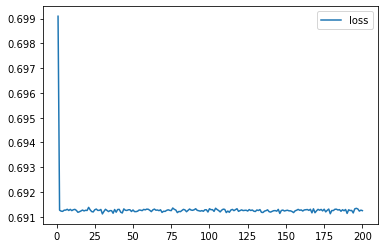

In [15]:
# Create a DataFrame containing training history
history_df3 = pd.DataFrame(fit_model3.history, index=range(1,len(fit_model3.history["loss"])+1))

# Plot the loss
history_df3.plot(y="loss")


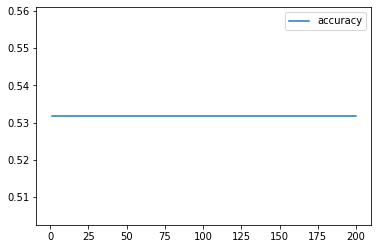

In [16]:
# Plot the accuracy
history_df3.plot(y="accuracy")


In [17]:
# Export our model to HDF5 file
nn3.save("trained_application3.h5")


In [18]:
# Google Collab
from google.colab import files
files.download("trained_application3.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>